<a href="https://colab.research.google.com/github/ashishmission93/Ashish-Autonomous-Vehicles-and-Drones-Projects/blob/main/problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulating Stabilize Mode...


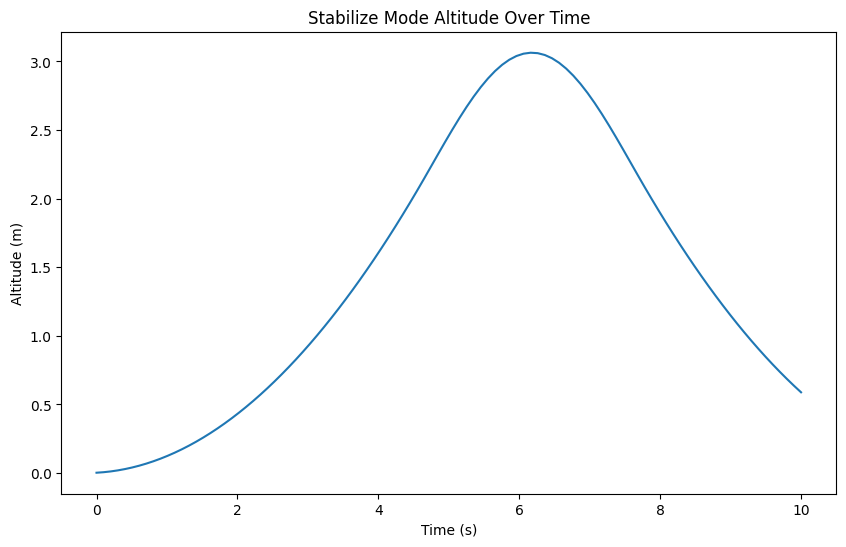


Simulating Position Hold Mode...


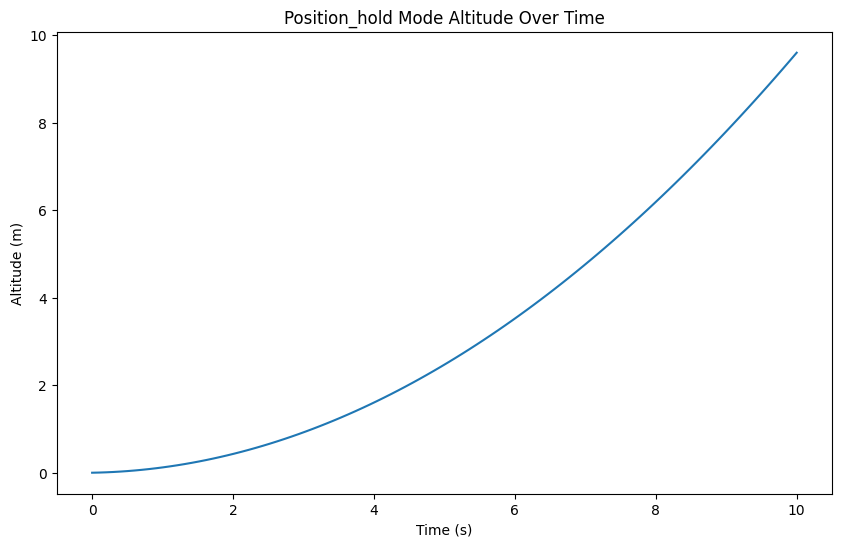


Simulating Altitude Hold Mode...


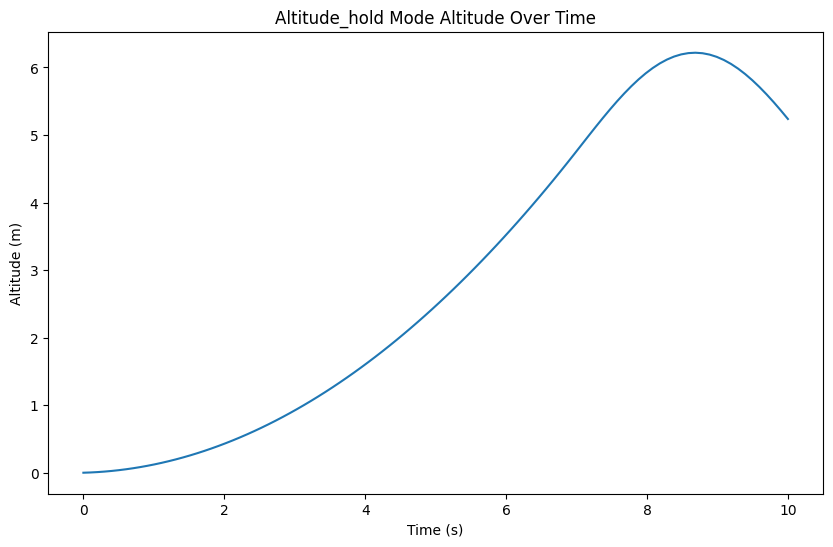

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Constants
GRAVITY = 9.81  # m/s²
MAX_THRUST = 15  # Max thrust in N
DRONE_MASS = 1.5  # kg

# PID Controller Class for Flight Control
class PIDController:
    def __init__(self, kp, ki, kd, setpoint=0):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.setpoint = setpoint
        self.integral = 0
        self.previous_error = 0

    def update(self, current_value):
        error = self.setpoint - current_value
        self.integral += error
        derivative = error - self.previous_error
        output = self.kp * error + self.ki * self.integral + self.kd * derivative
        self.previous_error = error
        return output

# Drone State Class
class Drone:
    def __init__(self):
        self.position = np.array([0.0, 0.0, 0.0])  # x, y, z
        self.velocity = np.array([0.0, 0.0, 0.0])
        self.thrust = 0.0

    def update(self, dt, control_thrust):
        # Calculate acceleration
        accel = np.array([0, 0, -GRAVITY]) + np.array([0, 0, control_thrust / DRONE_MASS])
        # Update velocity and position
        self.velocity += accel * dt
        self.position += self.velocity * dt
        return self.position, self.velocity

# Stabilize Mode
def stabilize_mode(drone, dt, target_z):
    # Simple PID for altitude stabilization
    pid_z = PIDController(kp=1.5, ki=0.1, kd=0.3, setpoint=target_z)
    thrust = pid_z.update(drone.position[2])
    thrust = np.clip(thrust, 0, MAX_THRUST)
    position, velocity = drone.update(dt, thrust)
    return position

# Position Hold Mode
def position_hold_mode(drone, dt, target_pos):
    # PID for x, y, z positions
    pid_x = PIDController(kp=2, ki=0.1, kd=0.3, setpoint=target_pos[0])
    pid_y = PIDController(kp=2, ki=0.1, kd=0.3, setpoint=target_pos[1])
    pid_z = PIDController(kp=2, ki=0.1, kd=0.3, setpoint=target_pos[2])

    # Thrust in x, y, z directions
    thrust_x = pid_x.update(drone.position[0])
    thrust_y = pid_y.update(drone.position[1])
    thrust_z = pid_z.update(drone.position[2])

    # Update drone with combined thrust
    thrust = np.sqrt(thrust_x**2 + thrust_y**2 + thrust_z**2)
    thrust = np.clip(thrust, 0, MAX_THRUST)
    position, velocity = drone.update(dt, thrust)
    return position

# Altitude Hold Mode
def altitude_hold_mode(drone, dt, target_altitude):
    pid_alt = PIDController(kp=1.2, ki=0.05, kd=0.2, setpoint=target_altitude)
    thrust = pid_alt.update(drone.position[2])
    thrust = np.clip(thrust, 0, MAX_THRUST)
    position, velocity = drone.update(dt, thrust)
    return position

# Simulation Function
def simulate_drone(mode, target, time_duration=10, dt=0.1):
    drone = Drone()
    positions = []
    time_steps = int(time_duration / dt)

    for t in range(time_steps):
        if mode == "stabilize":
            pos = stabilize_mode(drone, dt, target)
        elif mode == "position_hold":
            pos = position_hold_mode(drone, dt, target)
        elif mode == "altitude_hold":
            pos = altitude_hold_mode(drone, dt, target)

        positions.append(pos[2])  # Tracking altitude for simplicity

    # Plotting altitude over time for visualization
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0, time_duration, time_steps), positions)
    plt.xlabel("Time (s)")
    plt.ylabel("Altitude (m)")
    plt.title(f"{mode.capitalize()} Mode Altitude Over Time")
    plt.show()

# Run Simulations for Each Mode
print("Simulating Stabilize Mode...")
simulate_drone(mode="stabilize", target=10)

print("\nSimulating Position Hold Mode...")
simulate_drone(mode="position_hold", target=np.array([5, 5, 10]))

print("\nSimulating Altitude Hold Mode...")
simulate_drone(mode="altitude_hold", target=15)

